In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 읽어오는 방법
Antartica_mass = pd.read_csv('data/antartica_mass.csv')


In [176]:
# 년월을 하나로 합치기
Antartica_mass['day'] = 0
for i in range(len(Antartica_mass)):
    Antartica_mass['day'][i] = str(Antartica_mass['year'][i]) + ' ' + str(Antartica_mass["month"][i])
# 년, 월 컬럼 제거
# Antartica_mass.drop(columns = ['year', 'month', 'day'], inplace=True)
print(Antartica_mass)

     year  month     mass      day
0    2002      4     0.00   2002 4
1    2002      5    23.70   2002 5
2    2002      8   -51.67   2002 8
3    2002      9    47.89   2002 9
4    2002     10    72.21  2002 10
5    2002     11   -59.54  2002 11
6    2002     12   -41.94  2002 12
7    2003      1   -47.77   2003 1
8    2003      2  -196.05   2003 2
9    2003      3  -164.51   2003 3
10   2003      4   -35.46   2003 4
11   2003      5     6.62   2003 5
12   2003      7  -118.07   2003 7
13   2003      8  -113.38   2003 8
14   2003      9  -121.68   2003 9
15   2003     10   -38.91  2003 10
16   2003     11   -98.21  2003 11
17   2003     12  -263.54  2003 12
18   2004      1  -324.03   2004 1
19   2004      2  -482.18   2004 2
20   2004      3  -330.45   2004 3
21   2004      4  -376.34   2004 4
22   2004      5  -147.69   2004 5
23   2004      6  -180.02   2004 6
24   2004      7  -304.17   2004 7
25   2004      8  -157.91   2004 8
26   2004      9  -154.07   2004 9
27   2004     10   -

C:\Users\socia\AppData\Local\Temp\ipykernel_14876\3150242207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Antartica_mass['day'][i] = str(Antartica_mass['year'][i]) + ' ' + str(Antartica_mass["month"][i])


<Figure size 5040x360 with 0 Axes>

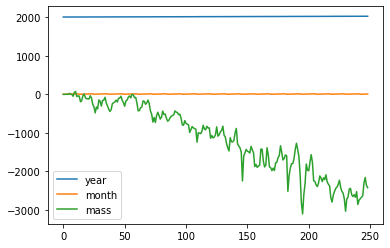

In [185]:
# matplotlib으로 데이터 확인 후 분석모델 결정하기
plt.figure(figsize = (70,5))
Antartica_mass.plot()
plt.show()

In [178]:
# 년도 별로 몇개 있는지 확인
for i in range(2002, 2022):
    print(f'{i} : ', end=" ")
    print(len(Antartica_mass[(Antartica_mass['year']==i)]))

2002 :  7
2003 :  11
2004 :  12
2005 :  12
2006 :  12
2007 :  12
2008 :  12
2009 :  12
2010 :  12
2011 :  9
2012 :  10
2013 :  9
2014 :  9
2015 :  8
2016 :  9
2017 :  4
2018 :  4
2019 :  12
2020 :  12
2021 :  12


In [179]:
# 각 달의 패턴 구하기
month = [0] * 13
for i in range(2004, 2011):
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    for j in range(1, 13):
        month[j] = month[j] + Antartica_mass[(Antartica_mass['year']==i)&(Antartica_mass['month']==j)]['mass'].values[0]/sum_i
for i in range(2019, 2022):
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    for j in range(1, 13):
        month[j] = month[j] + Antartica_mass[(Antartica_mass['year']==i)&(Antartica_mass['month']==j)]['mass'].values[0]/sum_i
#         print(month[j])

# print(month)
num = 0
for i in range(1, 13):
    month[i] /= (10)
    num += month[i]


print(month)
print(num)

[0, 0.10732268300995607, 0.11845429196759767, 0.09919090053822208, 0.08854821097758689, 0.06903872063857984, 0.06941283004229584, 0.07861336105100211, 0.06725414975807427, 0.05978714183491383, 0.06748592545979964, 0.07630955623165835, 0.0985822284903134]
1.0


In [180]:
# row값 전체로 볼 수 있게하기
# pd.set_option('display.max_rows', None)

In [181]:
# 위의 달의 패턴을 바탕으로 데이터가 없는 달에 값을 넣기


# 년도에서 데이터가 있는 달의 비율의 합을 구하기
for i in range(2002, 2023):
    # 해당 년도에서 데이터가 있는 달의 데이터 합을 구하기
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    # 데이터가 없는 달의 value 구하기
    data_month = [False] * 13
    # 해당 년도 있는 달들의 비율의 합을 구하기
    sum_ratio = 0
    for j in range(1, 13):
        # 해당 년도에 이 데이터가 있는지 없는지 확인
        # 있는 경우
        if  (Antartica_mass[(Antartica_mass['year']==i) & (Antartica_mass['month']==j)]['mass']).any():
            sum_ratio += month[j]
        else:
            data_month[j] = True
    
    # 없는 달의 데이터만 추가해서 넣기
    for j in range(1, 13):
        # 없는 달의 데이터 
        if data_month[j]:
            # 그 달의 데이터 구하기 (이번년도의 있는 데이터의 합 / 이번년도 잇는 데이터의 달 비율 합 * 그달의 비율)
            value = sum_i / sum_ratio * month[j]
            Antartica_mass.loc[len(Antartica_mass)] = [i, j, value, str(i) + " " + str(j)]
# 년도와 월로 다시 정렬하기
Antartica_mass.sort_values(by=['year', 'month'], inplace=True)
Antartica_mass.drop(['day'], axis=1,inplace=True)
# 이 순으로 인덱스 정하기
Antartica_mass.reset_index(drop=True, inplace=True)
print(Antartica_mass)
        

     year  month         mass
0    2002      1    -2.288629
1    2002      2    -2.526008
2    2002      3    -2.115221
3    2002      4     0.000000
4    2002      4    -1.888268
5    2002      5    23.700000
6    2002      6    -1.480211
7    2002      7    -1.676410
8    2002      8   -51.670000
9    2002      9    47.890000
10   2002     10    72.210000
11   2002     11   -59.540000
12   2002     12   -41.940000
13   2003      1   -47.770000
14   2003      2  -196.050000
15   2003      3  -164.510000
16   2003      4   -35.460000
17   2003      5     6.620000
18   2003      6   -88.834133
19   2003      7  -118.070000
20   2003      8  -113.380000
21   2003      9  -121.680000
22   2003     10   -38.910000
23   2003     11   -98.210000
24   2003     12  -263.540000
25   2004      1  -324.030000
26   2004      2  -482.180000
27   2004      3  -330.450000
28   2004      4  -376.340000
29   2004      5  -147.690000
30   2004      6  -180.020000
31   2004      7  -304.170000
32   2004 

In [182]:
#데이터 정리하기(2022년도 9월까지만 하기)
Antartica_mass.drop(labels=range(249,254), inplace=True)

In [183]:
# 정리한 데이터 저장하기
Antartica_mass.to_csv("Antartica_mass_last.csv")

In [184]:
print(Antartica_mass[(Antartica_mass['year']==2004)&(Antartica_mass['month']==3)]["mass"].values)

[-330.45]
